In [219]:
# Install emoji package
!pip install emoji==2.2.0

# install textblob package for performing sentiments analysis
!pip install textblob

!pip install wordcloud

In [221]:
# Imports
from collections import Counter
import plotly.graph_objs as go
from plotly.offline import iplot
import plotly.express as px
import string
import emoji
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from sqlalchemy import create_engine
import os
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [222]:
# Import dataset
dataset_path = r'./p1-youtube-dataset/UScomments.csv'
comments = pd.read_csv(dataset_path, on_bad_lines='skip')

In [223]:
comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [224]:
comments.shape

(691400, 4)

In [226]:
# Identify null / blank comments
comments.isnull().sum()

video_id         0
comment_text    26
likes            0
replies          0
dtype: int64

In [227]:
# Drop Null / blank comments
comments.dropna(inplace=True)

In [228]:
# Create a list of comment sentiments

polarity = []

for comment in comments['comment_text']:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)

In [229]:
len(polarity)

691374

In [230]:
# Create polarity column
comments['polarity'] = polarity

In [231]:
comments.head()

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


In [232]:
# Filter by positive sentiments
posfilter = comments['polarity'] == 1
comments_positive = comments[posfilter]

In [233]:
# Filter by negative sentiments
negfilter = comments['polarity'] == -1
comments_negative = comments[negfilter]

In [236]:
# Contatenate all positive and negative comments to be able to construct Word Cloud
total_positive_comments = ' '.join(comments_positive['comment_text'])
total_negative_comments = ' '.join(comments_negative['comment_text'])

(-0.5, 399.5, 199.5, -0.5)

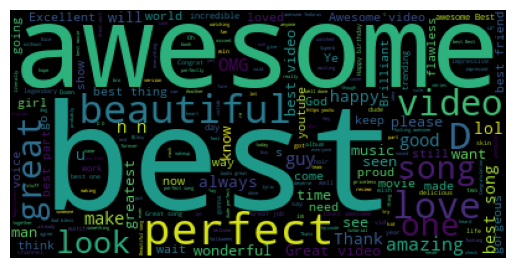

In [237]:
# Contstruct postive word cloud
poswordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_positive_comments)
plt.imshow(poswordcloud)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

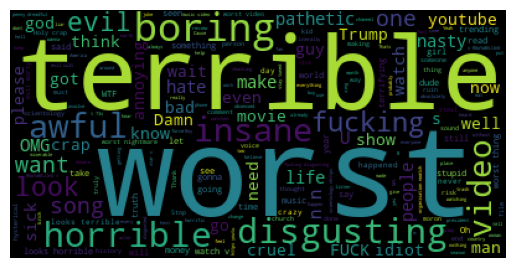

In [238]:
# Contstruct negative word cloud
negwordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_negative_comments)
plt.imshow(negwordcloud)
plt.axis('off')

In [239]:
# Extract emojis for emoji analysis

emoji_list = []

for comment in comments['comment_text'].dropna():
    for char in comment:
        if char in emoji.EMOJI_DATA:
            emoji_list.append(char)

len(emoji_list)
    

294549

In [240]:
# Use Counter package to count occurrences of top 10 emojis
emojis = [Counter(emoji_list).most_common(10)[i][0] for i in range(10)]
freqs = [Counter(emoji_list).most_common(10)[i][1] for i in range(10)]
print(emojis)
print(freqs)

['😂', '😍', '❤', '🔥', '😭', '👏', '😘', '👍', '💖', '💕']
[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]


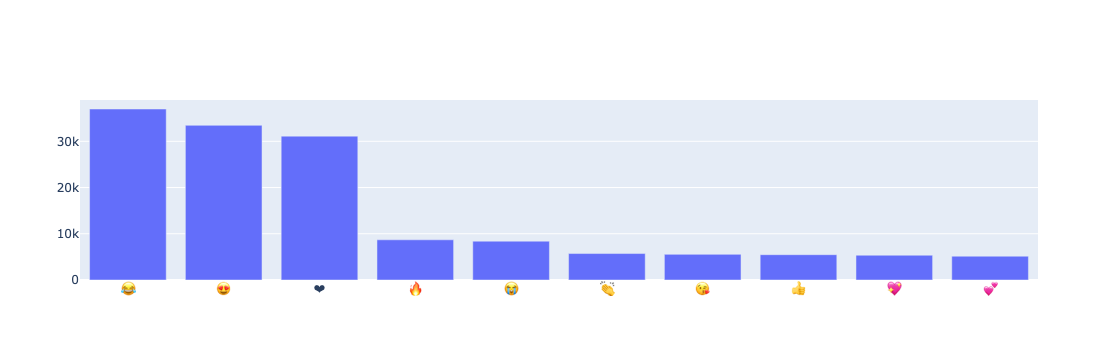

In [241]:
# Plot emojis vs their counts
trace = go.Bar(x=emojis, y=freqs)
iplot([trace])

In [242]:
# Data collection of Youtube data
additional_data_path = r'./p1-youtube-dataset/additional_data/'
files = os.listdir(additional_data_path)

In [244]:
# Parse additional Youtube video information
csvfiles = [csvfile for csvfile in files if '.csv' in csvfile]
jsonfiles = [jsonfile for jsonfile in files if '.json' in jsonfile]
csvfiles, jsonfiles

(['MXvideos.csv',
  'INvideos.csv',
  'DEvideos.csv',
  'JPvideos.csv',
  'KRvideos.csv',
  'CAvideos.csv',
  'RUvideos.csv',
  'FRvideos.csv',
  'USvideos.csv',
  'GBvideos.csv'],
 ['IN_category_id.json',
  'RU_category_id.json',
  'JP_category_id.json',
  'FR_category_id.json',
  'GB_category_id.json',
  'KR_category_id.json',
  'MX_category_id.json',
  'CA_category_id.json',
  'US_category_id.json',
  'DE_category_id.json'])

In [245]:
# Concatenate all csv data into Dataframe.
full_df = pd.DataFrame()

for file in csv:
    # create dataframe from data in current file
    current = pd.read_csv(additional_data_path+file, encoding='iso-8859-1', on_bad_lines='skip')

    # concatenate new data into full_df
    full_df = pd.concat([full_df, current])

In [246]:
full_df.shape

(375942, 16)

In [247]:
# View duplicate information
full_df[full_df.duplicated()].shape

(36417, 16)

In [248]:
# Remove duplicated rows
full_df = full_df.drop_duplicates()
full_df.shape

(339525, 16)

In [249]:
# Export concatenated CSV data to csv
full_df.to_csv(r'./p1-youtube_sample.csv', index=False)


full_df.reset_index(inplace=True)

# Export data to json
full_df.to_json(r'./p1-youtube_sample.json')

In [145]:
# Export data to a database
engine = create_engine(r'sqlite:///./youtube_sample.sqlite')

In [158]:
full_df.columns

Index(['level_0', 'index', 'video_id', 'trending_date', 'title',
       'channel_title', 'category_id', 'publish_time', 'tags', 'views',
       'likes', 'dislikes', 'comment_count', 'thumbnail_link',
       'comments_disabled', 'ratings_disabled', 'video_error_or_removed',
       'description'],
      dtype='object')

In [159]:
# Export first 1000 rows of CSV data to SQLite
full_df[0:1000].to_sql('Users', con=engine, if_exists='append', index=False)

1000

In [160]:
# Analysing the most popular category
full_df['category_id'].unique()

array([24, 22, 25, 26, 10, 23, 17,  2,  1, 29, 27, 28, 20, 15, 19, 43, 30,
       44])

In [165]:
# Collect category information from json file
catjson_df = pd.read_json(additional_data_path + '/US_category_id.json')
catjson_df['items'][1]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
 'id': '2',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Autos & Vehicles',
  'assignable': True}}

In [170]:
# Create category dictionary
cat_dict = {}

for item in catjson_df['items'].values[0:100]:
    cat_dict[int(item['id'])] = item['snippet']['title']

In [171]:
cat_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [250]:
# Add category_name column to Youtube video dataframe
full_df['category_name'] = full_df['category_id'].map(cat_dict)

In [174]:
full_df.head()

,level_0,index,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,0,0,SbOwzAl9ZfQ,17.14.11,CapÃ­tulo 12 | MasterChef 2017,MasterChef 2017,24,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,361,1836,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,False,False,False,Disfruta la presencia del Chef Torreblanca en ...,Entertainment
1,1,1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972,271,174,369,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,People & Blogs
2,2,2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA,El Pulso De La RepÃºblica,25,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,266,607,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,False,False,False,La canciÃ³n del principio se llama âEste esp...,News & Politics
3,3,3,hcY52MFWMDM,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25,2017-11-13T03:47:10.000Z,"temblor|""costa rica""|""sismo en costa rica""",96153,378,171,208,https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg,False,False,False,El video es de un Walmart en el pais centroame...,News & Politics
4,4,4,_OXDcGPVAa4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26,2017-11-13T19:17:48.000Z,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965,57781,681,7428,https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg,False,False,False,MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...,Howto & Style


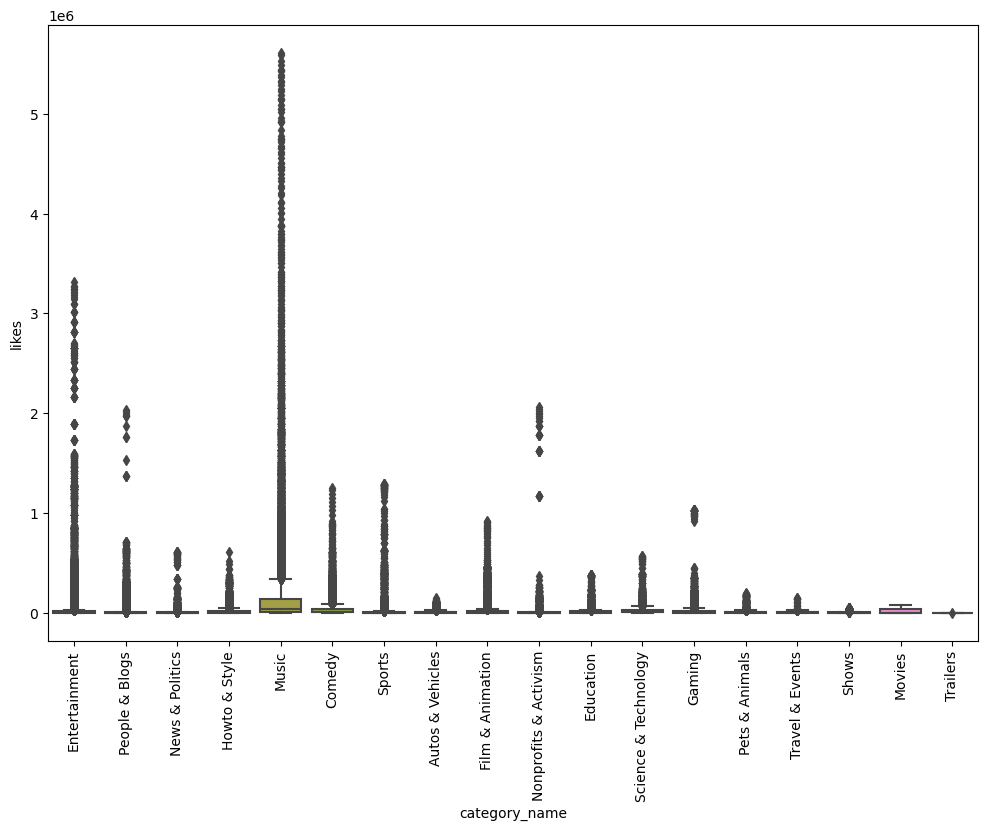

In [180]:
# Which category has the most likes? 
plt.figure(figsize=(12,8))
sns.boxplot(x='category_name', y='likes', data=full_df)
plt.xticks(rotation='vertical')
plt.show()

In [178]:
# Discover audience engagement based on likes, dislikes and comment count.

full_df['like_rate'] = (full_df['likes']/full_df['views'])*100
full_df['dislike_rate'] = (full_df['dislikes']/full_df['views'])*100
full_df['comment_count_rate'] = (full_df['comment_count']/full_df['views'])*100

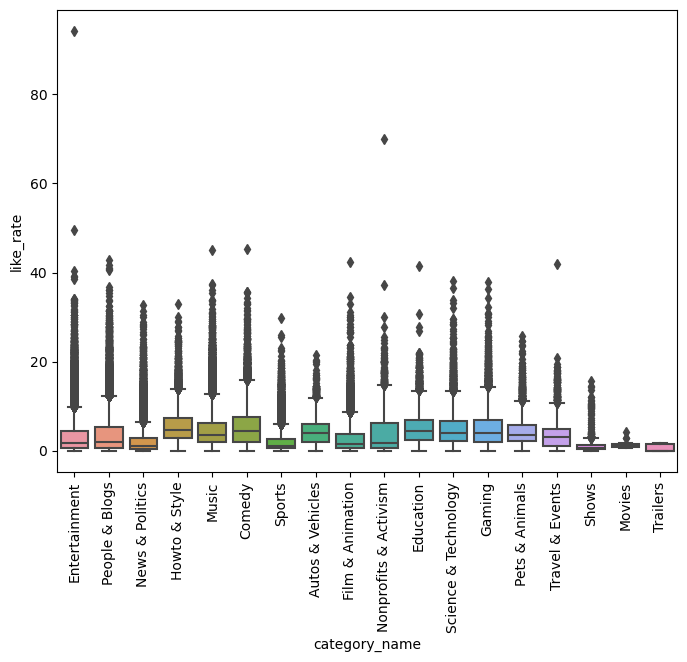

In [181]:
# Plot category_name by like_rate 
plt.figure(figsize=(8,6))
sns.boxplot(x='category_name', y='like_rate', data=full_df)
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='views', ylabel='likes'>

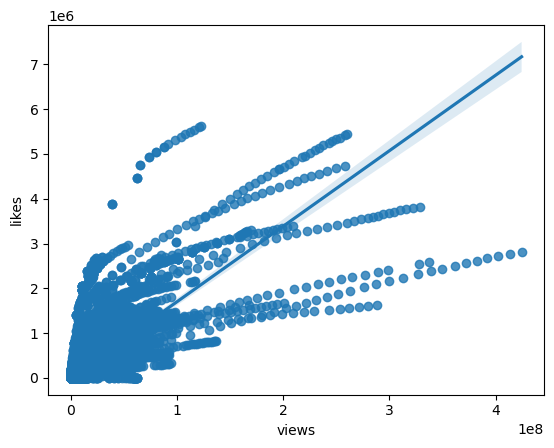

In [182]:
# Show relationship between views and likes
sns.regplot(x='views', y='likes', data=full_df)

In [184]:
# Correlation data between views, likes and dislikes
full_df[['views', 'likes', 'dislikes']].corr()

,views,likes,dislikes
views,1.000000,0.779531,0.405428
likes,0.779531,1.000000,0.451809
dislikes,0.405428,0.451809,1.000000


<Axes: >

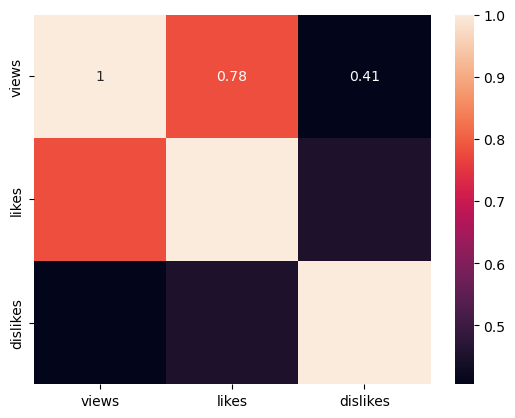

In [186]:
# View correlation data as a heatmap
sns.heatmap(full_df[['views', 'likes', 'dislikes']].corr(), annot=True)

In [187]:
# Which channels have the largest number of trending videos?

# Can use valuecounts to see channels and video counts (Will use groupby instead below)
full_df['channel_title'].value_counts()

channel_title
The Late Show with Stephen Colbert    710
WWE                                   643
Late Night with Seth Meyers           592
TheEllenShow                          555
Jimmy Kimmel Live                     528
                                     ... 
ABIZ ENT BUZZ                           1
JENNYMOMENT                             1
Drache Offiziell                        1
Jules                                   1
The Chainsmokers                        1
Name: count, Length: 37824, dtype: int64

In [193]:
# Using groupby to better effectively convert values to a df
cdf = full_df.groupby(['channel_title']).size().sort_values(ascending=False).reset_index()
cdf

,channel_title,0
0,The Late Show with Stephen Colbert,710
1,WWE,643
2,Late Night with Seth Meyers,592
3,TheEllenShow,555
4,Jimmy Kimmel Live,528
...,...,...
37819,Kd Malts,1
37820,Zedan TV,1
37821,Kc Kelly - Rocketprenuer,1
37822,Kbaby,1


In [196]:
cdf.rename(columns={0: 'total_videos'}, inplace=True)

In [197]:
cdf

,channel_title,total_videos
0,The Late Show with Stephen Colbert,710
1,WWE,643
2,Late Night with Seth Meyers,592
3,TheEllenShow,555
4,Jimmy Kimmel Live,528
...,...,...
37819,Kd Malts,1
37820,Zedan TV,1
37821,Kc Kelly - Rocketprenuer,1
37822,Kbaby,1


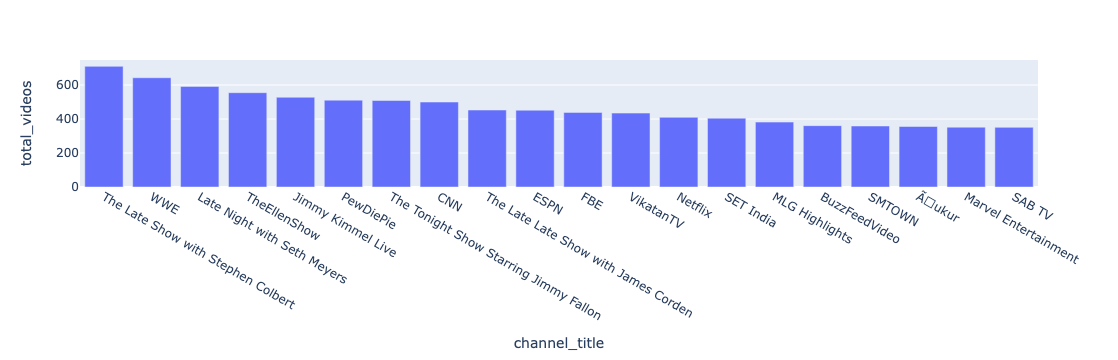

In [201]:
px.bar(data_frame=cdf[0:20], x='channel_title', y='total_videos')

In [204]:
# Does punctuation have an impact on views,likes and dislikes?

full_df['title'][0]

'CapÃ\xadtulo 12 | MasterChef 2017'

In [205]:
# use string package to check punctuation in strings
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [208]:
# View list of punctuation marks in text
[char for char in full_df['title'][0] if char in string.punctuation]

['|']

In [213]:
# Create function to count punctuation code in each line of text
def punc_count(text):
    return len([char for char in text if char in string.punctuation])

In [214]:
# run on a sample of the data
sample = full_df[0:10000]
sample['count_punc'] = sample['title'].apply(punc_count)

In [215]:
sample['count_punc']

0       1
1       3
2       1
3       1
4       1
       ..
9995    2
9996    3
9997    1
9998    1
9999    0
Name: count_punc, Length: 10000, dtype: int64

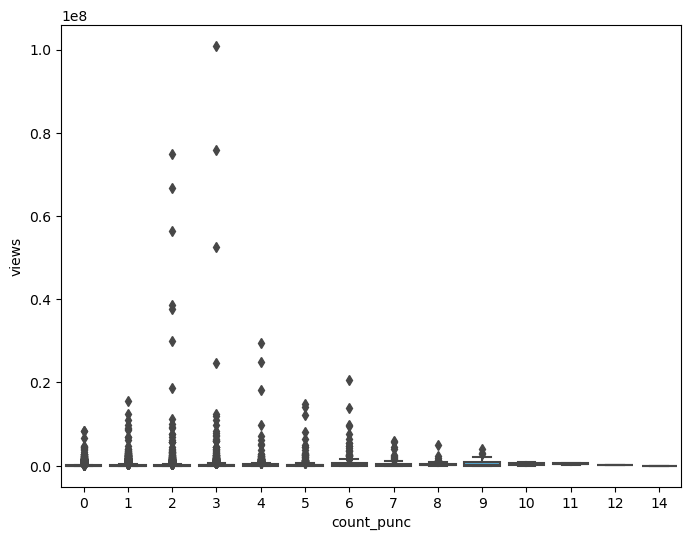

In [216]:
# Visualize relation between punctuation counts and views
plt.figure(figsize=(8,6))
sns.boxplot(x='count_punc', y='views', data=sample)
plt.show()

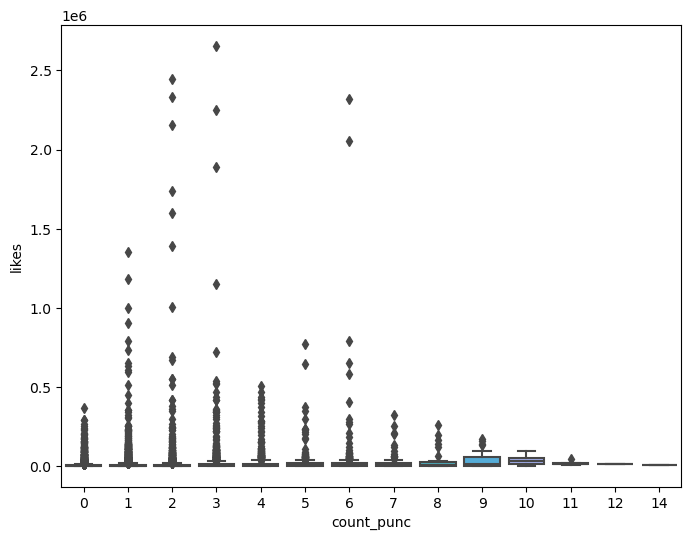

In [217]:
# Visualize relation between punctuation counts and likes
plt.figure(figsize=(8,6))
sns.boxplot(x='count_punc', y='likes', data=sample)
plt.show()

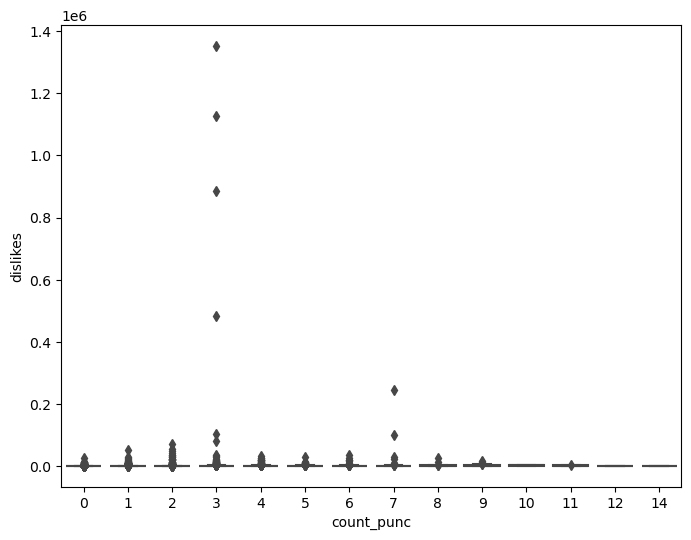

In [218]:
# Visualize relation between punctuation counts and dislikes
plt.figure(figsize=(8,6))
sns.boxplot(x='count_punc', y='dislikes', data=sample)
plt.show()